In [2]:
# Import Libraries

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [109]:
# Load Data

df: pd.DataFrame = pd.read_excel('Coffee Shop Sales.xlsx')

In [110]:
# Display Head Data

df.head()

,transaction_id,transaction_date,transaction_time,transaction_qty,store_id,store_location,product_id,unit_price,product_category,product_type,product_detail
0,1,2023-01-01,07:06:11,2,5,Lower Manhattan,32,3.0,Coffee,Gourmet brewed coffee,Ethiopia Rg
1,2,2023-01-01,07:08:56,2,5,Lower Manhattan,57,3.1,Tea,Brewed Chai tea,Spicy Eye Opener Chai Lg
2,3,2023-01-01,07:14:04,2,5,Lower Manhattan,59,4.5,Drinking Chocolate,Hot chocolate,Dark chocolate Lg
3,4,2023-01-01,07:20:24,1,5,Lower Manhattan,22,2.0,Coffee,Drip coffee,Our Old Time Diner Blend Sm
4,5,2023-01-01,07:22:41,2,5,Lower Manhattan,57,3.1,Tea,Brewed Chai tea,Spicy Eye Opener Chai Lg


In [111]:
# Display Tail Data

df.tail()

,transaction_id,transaction_date,transaction_time,transaction_qty,store_id,store_location,product_id,unit_price,product_category,product_type,product_detail
149111,149452,2023-06-30,20:18:41,2,8,Hell's Kitchen,44,2.50,Tea,Brewed herbal tea,Peppermint Rg
149112,149453,2023-06-30,20:25:10,2,8,Hell's Kitchen,49,3.00,Tea,Brewed Black tea,English Breakfast Lg
149113,149454,2023-06-30,20:31:34,1,8,Hell's Kitchen,45,3.00,Tea,Brewed herbal tea,Peppermint Lg
149114,149455,2023-06-30,20:57:19,1,8,Hell's Kitchen,40,3.75,Coffee,Barista Espresso,Cappuccino
149115,149456,2023-06-30,20:57:19,2,8,Hell's Kitchen,64,0.80,Flavours,Regular syrup,Hazelnut syrup


In [112]:
# Display Info Data

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 149116 entries, 0 to 149115
Data columns (total 11 columns):
 #   Column            Non-Null Count   Dtype         
---  ------            --------------   -----         
 0   transaction_id    149116 non-null  int64         
 1   transaction_date  149116 non-null  datetime64[ns]
 2   transaction_time  149116 non-null  object        
 3   transaction_qty   149116 non-null  int64         
 4   store_id          149116 non-null  int64         
 5   store_location    149116 non-null  object        
 6   product_id        149116 non-null  int64         
 7   unit_price        149116 non-null  float64       
 8   product_category  149116 non-null  object        
 9   product_type      149116 non-null  object        
 10  product_detail    149116 non-null  object        
dtypes: datetime64[ns](1), float64(1), int64(4), object(5)
memory usage: 12.5+ MB


In [188]:
# Display quick info of numeric data

df.describe()

,transaction_id,transaction_qty,store_id,product_id,unit_price,month
count,149116.000000,149116.000000,149116.000000,149116.000000,149116.000000,149116.000000
mean,74737.371872,1.438276,5.342063,47.918607,3.382219,3.988881
std,43153.600016,0.542509,2.074241,17.930020,2.658723,1.673091
min,1.000000,1.000000,3.000000,1.000000,0.800000,1.000000
25%,37335.750000,1.000000,3.000000,33.000000,2.500000,3.000000
50%,74727.500000,1.000000,5.000000,47.000000,3.000000,4.000000
75%,112094.250000,2.000000,8.000000,60.000000,3.750000,5.000000
max,149456.000000,8.000000,8.000000,87.000000,45.000000,6.000000


In [189]:
# see quick info of categorical data

df.describe(include = object)

,transaction_time,store_location,product_category,product_type,product_detail
count,149116,149116,149116,149116,149116
unique,25762,3,9,29,80
top,09:31:15,Hell's Kitchen,Coffee,Brewed Chai tea,Chocolate Croissant
freq,41,50735,58416,17183,3076


In [187]:
# Check for duplicated rows

df.duplicated().any()

False

In [113]:
# Check for missing values
df.isnull().sum()

transaction_id      0
transaction_date    0
transaction_time    0
transaction_qty     0
store_id            0
store_location      0
product_id          0
unit_price          0
product_category    0
product_type        0
product_detail      0
dtype: int64

In [114]:
# Check how many stores the df has
df['store_id'].unique()

array([5, 8, 3], dtype=int64)

In [156]:
# Sells amount per store

stores = {}
for store in df['store_id'].unique():
    stores[store] = df[df['store_id'] == store]['transaction_qty'].sum()

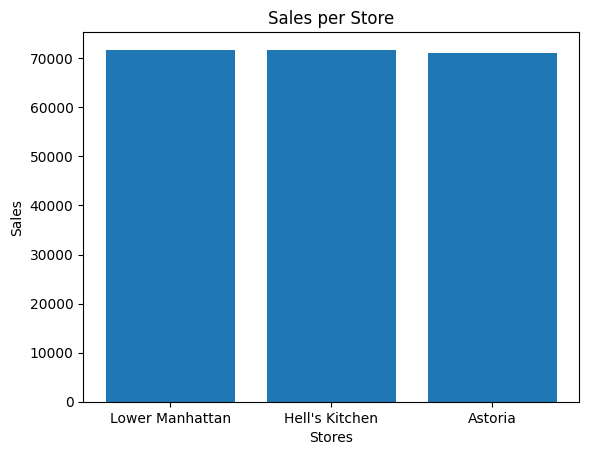

In [163]:
# Plotting the sales per store

plt.bar(df['store_location'].unique(), stores.values())
plt.xlabel('Stores')
plt.ylabel('Sales')
plt.title('Sales per Store')
plt.show()

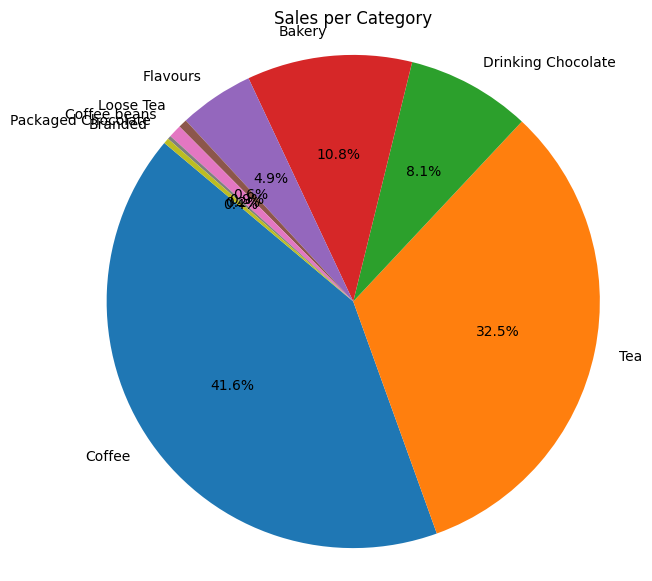

In [134]:
# Pie Chart - Sales per category of product

products_category = {}
for category in df['product_category'].unique():
    products_category[category] = df[df['product_category'] == category]['transaction_qty'].sum()
    
df['product_category'].unique()

plt.figure(figsize=(7, 7))
plt.pie(products_category.values(), labels=products_category.keys(), autopct='%1.1f%%', startangle=140)
plt.axis('equal')
plt.title('Sales per Category')
plt.show()

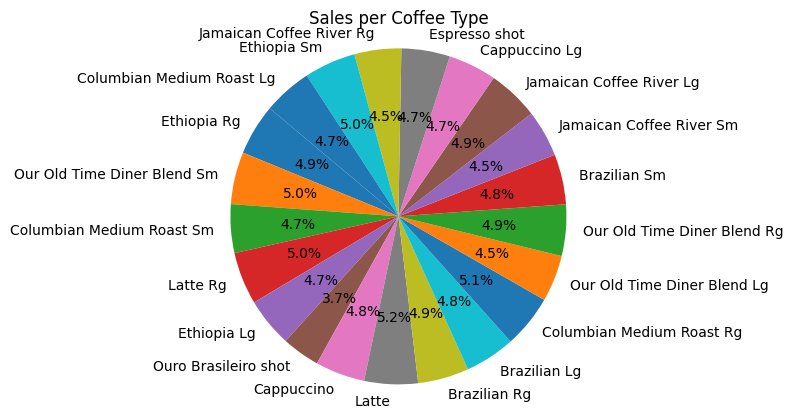

In [135]:
# Pie Chart - Most sold coffee type

coffee_df = df[df['product_category'] == 'Coffee']
c_type_sells = {}
for c_type in coffee_df['product_detail'].unique():
    c_type_sells[c_type] = coffee_df[coffee_df['product_detail'] == c_type]['transaction_qty'].sum()
    
plt.pie(c_type_sells.values(), labels=c_type_sells.keys(), autopct='%1.1f%%', startangle=140)
plt.axis('equal')
plt.title('Sales per Coffee Type')
plt.show()

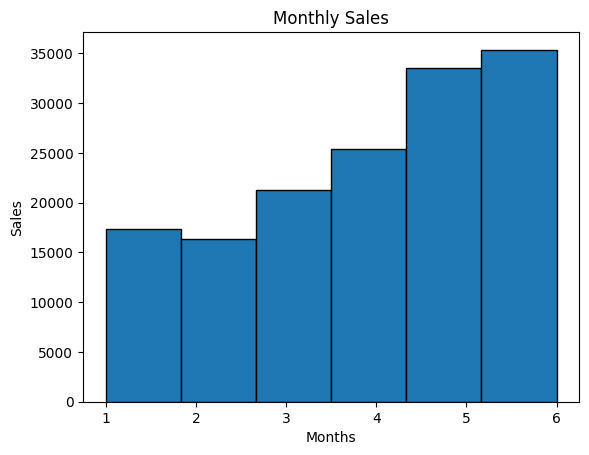

In [154]:
# Histogram - Monthly Sales

df['transaction_date'] = pd.to_datetime(df['transaction_date'])
df['month'] = df['transaction_date'].dt.month
df['month'].unique()

monthly_sales = {}
for month in df['month'].unique():
    monthly_sales[month] = df[df['month'] == month]['transaction_qty'].sum()
    
plt.hist(df['month'], bins=6, edgecolor='black', align='mid')
plt.xlabel('Months')
plt.ylabel('Sales')
plt.title('Monthly Sales')
plt.show()

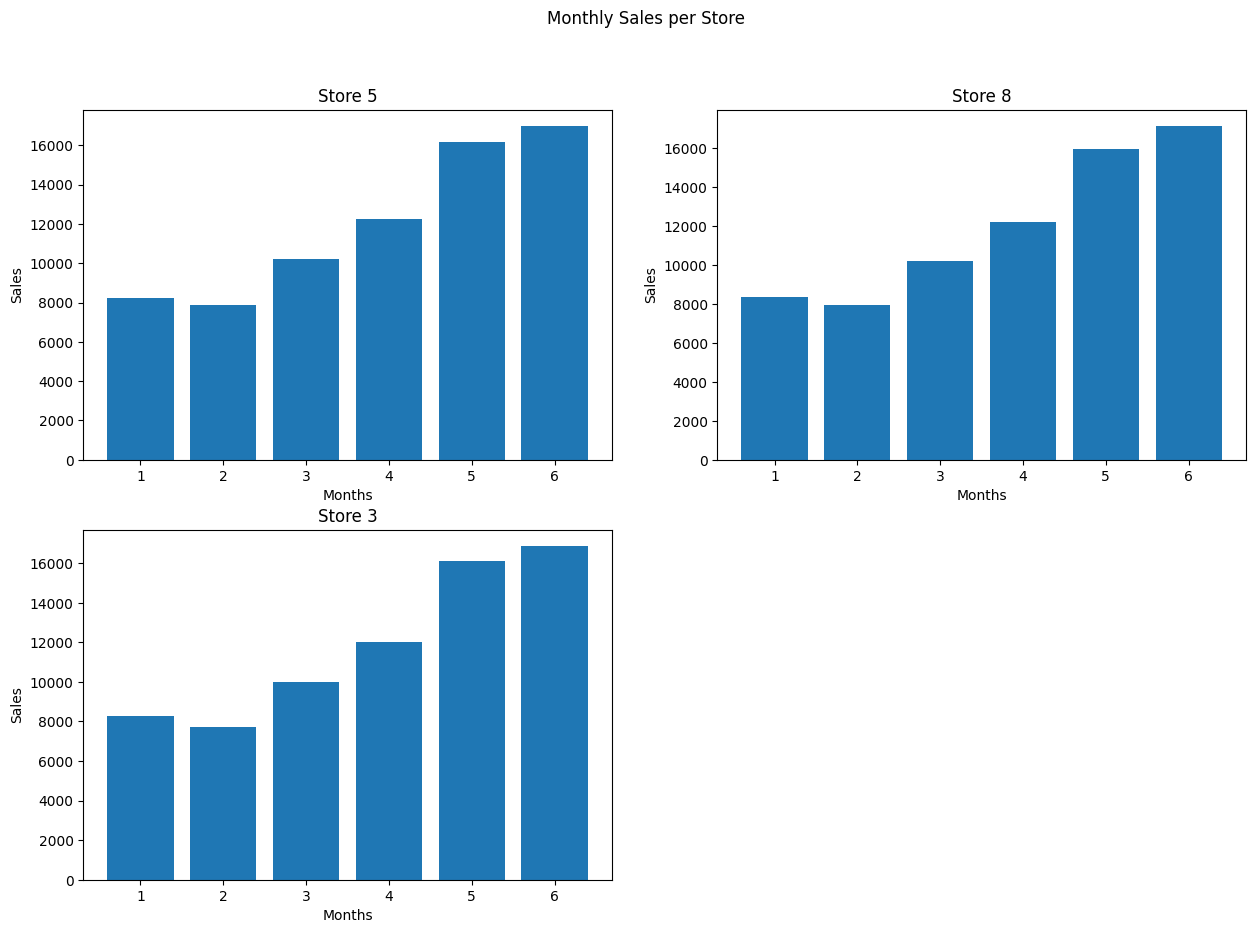

In [175]:
# Histogram - Monthly Sales Per Store

monthly_sales_per_store = {}
for store in df['store_id'].unique():
    monthly_sales_per_store[store] = {}
    for month in df['month'].unique():
        monthly_sales_per_store[store][month] = df[(df['store_id'] == store) & (df['month'] == month)]['transaction_qty'].sum()
        
fig, ax = plt.subplots(2, 2, figsize=(15, 10))
fig.suptitle('Monthly Sales per Store')
ax = ax.ravel()

for i, store in enumerate(df['store_id'].unique()):
    ax[i].bar(monthly_sales_per_store[store].keys(), monthly_sales_per_store[store].values())
    ax[i].set_title(f'Store {store}')
    ax[i].set_xlabel('Months')
    ax[i].set_ylabel('Sales')

fig.delaxes(ax[-1])
plt.show()